##  Import Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Modeling Libraries
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from imblearn.over_sampling import SMOTE

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Exploration Data Analysis

In [ ]:
url = 'https://raw.githubusercontent.com/citaakml/dataset/main/dataset_dbd.csv'
data = pd.read_csv(url)
data.head()

,Kecamatan,Jumlah_Penduduk,Proporsi_Penduduk_Laki,Curah_Hujan,Suhu,Kelembaban,GoldarA,GoldarB,GoldarAB,GoldarO,Tamat_SD,Tamat_SMP,Tamat_SMA,Tamat_Kuliah,Insiden_Rate_(/100000_Penduduk),Tahun,Label_rate
0,Andir,99085,0.504547,193.2,23.5,77.4,11326,7069,3663,13091,12323,15999,35744,51743,33.304738,2017,1
1,Antapani,75209,0.502094,193.2,23.5,77.4,15876,11883,5334,17733,6154,7912,22661,30573,122.325785,2017,3
2,Arcamanik,72424,0.504543,193.2,23.5,77.4,12670,8857,4315,14241,8127,9045,20255,29300,85.606981,2017,2
3,Astana Anyar,73236,0.501761,193.2,23.5,77.4,7585,6371,3506,12591,8677,11508,26368,37876,79.196024,2017,2
4,Babakan Ciparay,132497,0.511883,193.2,23.5,77.4,16206,4904,3203,9906,29951,22756,34170,56926,12.830479,2017,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Kecamatan                        150 non-null    object 
 1   Jumlah_Penduduk                  150 non-null    int64  
 2   Proporsi_Penduduk_Laki           150 non-null    float64
 3   Curah_Hujan                      150 non-null    float64
 4   Suhu                             150 non-null    float64
 5   Kelembaban                       150 non-null    float64
 6   GoldarA                          150 non-null    int64  
 7   GoldarB                          150 non-null    int64  
 8   GoldarAB                         150 non-null    int64  
 9   GoldarO                          150 non-null    int64  
 10  Tamat_SD                         150 non-null    int64  
 11  Tamat_SMP                        150 non-null    int64  
 12  Tamat_SMA             

In [ ]:
data.isnull().sum()

Kecamatan                          0
Jumlah_Penduduk                    0
Proporsi_Penduduk_Laki             0
Curah_Hujan                        0
Suhu                               0
Kelembaban                         0
GoldarA                            0
GoldarB                            0
GoldarAB                           0
GoldarO                            0
Tamat_SD                           0
Tamat_SMP                          0
Tamat_SMA                          0
Tamat_Kuliah                       0
Insiden_Rate_(/100000_Penduduk)    0
Tahun                              0
Label_rate                         0
dtype: int64

In [ ]:
data = data.rename(columns={'Insiden_Rate_(/100000_Penduduk)':'IR'})
data.head()

,Kecamatan,Jumlah_Penduduk,Proporsi_Penduduk_Laki,Curah_Hujan,Suhu,Kelembaban,GoldarA,GoldarB,GoldarAB,GoldarO,Tamat_SD,Tamat_SMP,Tamat_SMA,Tamat_Kuliah,IR,Tahun,Label_rate
0,Andir,99085,0.504547,193.2,23.5,77.4,11326,7069,3663,13091,12323,15999,35744,51743,33.304738,2017,1
1,Antapani,75209,0.502094,193.2,23.5,77.4,15876,11883,5334,17733,6154,7912,22661,30573,122.325785,2017,3
2,Arcamanik,72424,0.504543,193.2,23.5,77.4,12670,8857,4315,14241,8127,9045,20255,29300,85.606981,2017,2
3,Astana Anyar,73236,0.501761,193.2,23.5,77.4,7585,6371,3506,12591,8677,11508,26368,37876,79.196024,2017,2
4,Babakan Ciparay,132497,0.511883,193.2,23.5,77.4,16206,4904,3203,9906,29951,22756,34170,56926,12.830479,2017,1


### Labeling Data

In [ ]:
label = ['Low', 'Medium', 'High']
label_class = [0, 55, 100]

def Label_Class(IR):
  kelas = 0
  if IR < 55:
    return kelas
  elif IR >= 55 and IR <= 100:
    return kelas + 1
  elif IR > 100:
    return kelas + 2


data['Label_Class'] = data['IR'].apply(Label_Class)
print(data.head())

         Kecamatan  Jumlah_Penduduk  Proporsi_Penduduk_Laki  Curah_Hujan  \
0            Andir            99085                0.504547        193.2   
1         Antapani            75209                0.502094        193.2   
2        Arcamanik            72424                0.504543        193.2   
3     Astana Anyar            73236                0.501761        193.2   
4  Babakan Ciparay           132497                0.511883        193.2   

   Suhu  Kelembaban  GoldarA  GoldarB  GoldarAB  GoldarO  Tamat_SD  Tamat_SMP  \
0  23.5        77.4    11326     7069      3663    13091     12323      15999   
1  23.5        77.4    15876    11883      5334    17733      6154       7912   
2  23.5        77.4    12670     8857      4315    14241      8127       9045   
3  23.5        77.4     7585     6371      3506    12591      8677      11508   
4  23.5        77.4    16206     4904      3203     9906     29951      22756   

   Tamat_SMA  Tamat_Kuliah          IR  Tahun  Label_rat

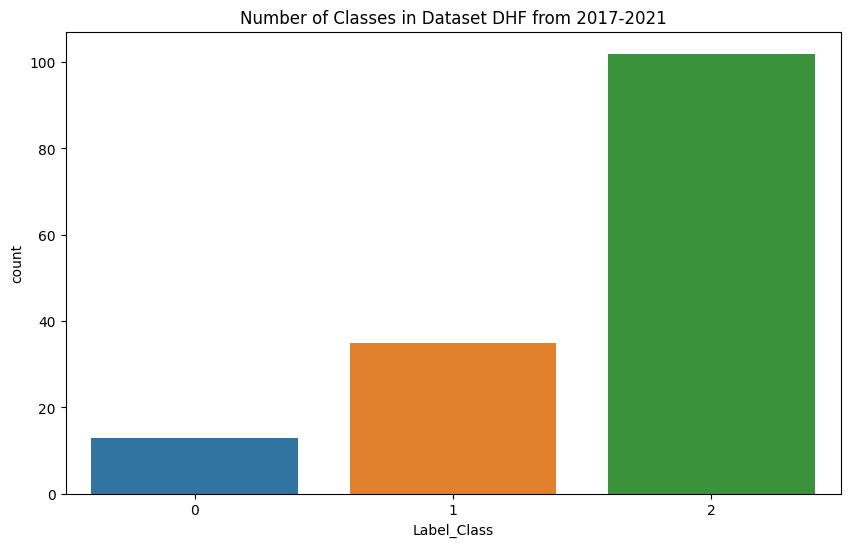

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title('Number of Classes in Dataset DHF from 2017-2021')
ax = sns.countplot(x=data['Label_Class'],
                   order=data['Label_Class'].value_counts(ascending=True).index);
abs_values = data['Label_Class'].value_counts(ascending=True)
plt.savefig('class.png')

In [ ]:
jumlah = data['Label_Class']
jumlah.value_counts()

2    102
1     35
0     13
Name: Label_Class, dtype: int64

In [ ]:
data.describe()

,Jumlah_Penduduk,Proporsi_Penduduk_Laki,Curah_Hujan,Suhu,Kelembaban,GoldarA,GoldarB,GoldarAB,GoldarO,Tamat_SD,Tamat_SMP,Tamat_SMA,Tamat_Kuliah,IR,Tahun,Label_rate,Label_Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,82483.626667,0.502685,199.946000,23.604000,76.966667,10962.026667,8019.680000,4048.960000,13688.453333,10156.773333,11370.153333,26241.913333,37612.066667,131.104278,2019.000000,3.713333,1.593333
std,30647.192459,0.003731,66.719281,0.214845,2.695302,4587.732732,3310.769394,1559.707178,5128.062527,6056.891857,5386.333540,9921.378117,14918.235587,58.493941,1.418951,1.639842,0.646069
min,24145.000000,0.494632,0.000000,23.000000,73.000000,1276.000000,1379.000000,749.000000,2537.000000,2126.000000,2848.000000,7897.000000,11612.000000,12.830479,2017.000000,1.000000,0.000000
25%,69183.000000,0.500134,167.900000,23.500000,75.000000,7588.500000,5071.750000,2863.250000,9185.500000,6449.750000,7873.750000,20913.500000,30078.000000,92.350834,2018.000000,3.000000,1.000000
50%,79936.000000,0.502005,193.200000,23.500000,77.000000,10922.000000,8236.500000,4088.000000,14353.000000,8835.500000,10443.500000,23986.500000,35673.500000,126.266618,2019.000000,4.000000,2.000000
75%,102484.750000,0.505407,223.300000,23.700000,79.000000,14670.000000,10512.500000,5325.750000,17514.750000,11968.250000,14063.000000,34437.250000,50821.500000,165.291872,2020.000000,5.000000,2.000000
max,142528.000000,0.511883,336.600000,24.200000,83.000000,19330.000000,16489.000000,7036.000000,23738.000000,29951.000000,24062.000000,46043.000000,64669.000000,316.111177,2021.000000,9.000000,2.000000


In [ ]:
data.drop(columns=['Kecamatan', 'IR', 'Tahun', 'Label_rate'], axis=1, inplace=True)
data.head()

,Jumlah_Penduduk,Proporsi_Penduduk_Laki,Curah_Hujan,Suhu,Kelembaban,GoldarA,GoldarB,GoldarAB,GoldarO,Tamat_SD,Tamat_SMP,Tamat_SMA,Tamat_Kuliah,Label_Class
0,99085,0.504547,193.2,23.5,77.4,11326,7069,3663,13091,12323,15999,35744,51743,0
1,75209,0.502094,193.2,23.5,77.4,15876,11883,5334,17733,6154,7912,22661,30573,2
2,72424,0.504543,193.2,23.5,77.4,12670,8857,4315,14241,8127,9045,20255,29300,1
3,73236,0.501761,193.2,23.5,77.4,7585,6371,3506,12591,8677,11508,26368,37876,1
4,132497,0.511883,193.2,23.5,77.4,16206,4904,3203,9906,29951,22756,34170,56926,0


## Modeling

#### SMOTE

In [ ]:
X = data.drop(['Label_Class'], axis=1) # fitur
y = data['Label_Class'] # target

In [ ]:
# SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalization
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Classifier Method

#### Support Vector Machine (SVM)

In [ ]:
#SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
gridSVM = GridSearchCV(svm_clf,param_grid)

#Fitting the model
gridSVM.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
#Calculating the accuracy of tuned model
grid_svc = gridSVM.predict(X_test_scaled)
svm_acc = accuracy_score(y_test,grid_svc)
print(svm_acc)

0.8548387096774194


In [ ]:
#Classification report for the tuned model
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.71      0.89      0.79        19
           2       0.94      0.71      0.81        24

    accuracy                           0.85        62
   macro avg       0.87      0.87      0.86        62
weighted avg       0.87      0.85      0.85        62



#### Naive Bayes

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Prediksi data testing
y_predNB = nb_clf.predict(X_test)
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.59      0.84      0.70        19
           1       0.38      0.16      0.22        19
           2       0.70      0.79      0.75        24

    accuracy                           0.61        62
   macro avg       0.56      0.60      0.55        62
weighted avg       0.57      0.61      0.57        62



#### Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
griddt = GridSearchCV(dt_clf, parameters)

#Fitting the model
griddt.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]})

In [ ]:
grid_dt = griddt.predict(X_test_scaled)
svm_acc = accuracy_score(y_test,grid_dt)
print(svm_acc)

0.7741935483870968


In [ ]:
print(classification_report(y_test,grid_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.63      0.63      0.63        19
           2       0.74      0.71      0.72        24

    accuracy                           0.77        62
   macro avg       0.77      0.78      0.78        62
weighted avg       0.77      0.77      0.77        62



#### Random Forest

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier()

# Hyperparameter Optimization
param_rf = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
gridrf = GridSearchCV(rf_clf, param_rf)

#Fitting the model
gridrf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9, 10, 15]})

In [ ]:
grid_rf = gridrf.predict(X_test_scaled)
svm_acc = accuracy_score(y_test,grid_rf)
print(svm_acc)

0.8064516129032258


In [ ]:
print(classification_report(y_test,grid_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.65      0.79      0.71        19
           2       0.84      0.67      0.74        24

    accuracy                           0.81        62
   macro avg       0.81      0.82      0.81        62
weighted avg       0.82      0.81      0.81        62



### Hybrid Classifier

In [ ]:
estimators=[
    ('svm', svm_clf),
    ('nb', nb_clf),
    ('dt', dt_clf),
    ('rf', rf_clf),
]

#### Stacking

In [ ]:
from sklearn.linear_model import LinearRegression

# Combine the predictions of the base models into a single feature matrix
X_test_meta = np.column_stack((grid_svc, y_predNB, grid_dt, grid_rf))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(X_test_meta, y_test)

LinearRegression()

In [ ]:
# Make predictions on new data
X_new = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]])

# Make predictions on new data using individual models
svm_pred_new = gridSVM.predict(X_new)
nb_pred_new = y_predNB.predict(X_new)
dt_pred_new = griddt.predict(X_new)
rf_pred_new = gridrf.predict(X_new)

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((svm_pred_new, nb_pred_new, dt_pred_new, rf_pred_new))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

AttributeError: ignored

In [ ]:
# Stacking
stacking_clf = StackingClassifier(estimators, final_estimator=None)

stacking_clf.fit(X_train, y_train)
y_predStacking = stacking_clf.predict(X_test)
print(classification_report(y_test, y_predStacking))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.76      0.84      0.80        19
           2       0.90      0.79      0.84        24

    accuracy                           0.87        62
   macro avg       0.87      0.88      0.87        62
weighted avg       0.87      0.87      0.87        62



#### Bagging

In [ ]:
# Bagging
bagging_clf=BaggingClassifier(estimator=rf_clf,n_estimators=50,
                      max_samples=0.5,bootstrap=True,random_state=42)
bagging_clf.fit(X_train,y_train)

y_predBagging = bagging_clf.predict(X_test)
print(classification_report(y_test, y_predBagging))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.69      0.95      0.80        19
           2       0.94      0.67      0.78        24

    accuracy                           0.85        62
   macro avg       0.88      0.87      0.86        62
weighted avg       0.88      0.85      0.85        62



## Results

In [ ]:
# Accuracy
accSVM = accuracy_score(y_test, grid_svc)
accNB = accuracy_score(y_test, y_predNB)
accDT = accuracy_score(y_test, grid_dt)
accRF = accuracy_score(y_test, grid_rf)
accStacking = accuracy_score(y_test, y_predStacking)
accBagging = accuracy_score(y_test, y_predBagging)

# Recall
recSVM = recall_score(y_test, grid_svc, average='macro')
recNB = recall_score(y_test, y_predNB, average='macro')
recDT = recall_score(y_test, grid_dt, average='macro')
recRF = recall_score(y_test, grid_rf, average='macro')
recStacking = recall_score(y_test, y_predStacking, average='macro')
recBagging = recall_score(y_test, y_predBagging, average='macro')


# Precision
precSVM = precision_score(y_test, grid_svc, average='macro')
precNB = precision_score(y_test, y_predNB, average='macro')
precDT = precision_score(y_test, grid_dt, average='macro')
precRF = precision_score(y_test, grid_rf, average='macro')
precStacking = precision_score(y_test, y_predStacking, average='macro')
precBagging = precision_score(y_test, y_predBagging, average='macro')

# F1-Score
f1_SVM = f1_score(y_test, grid_svc, average='macro')
f1_NB = f1_score(y_test, y_predNB, average='macro')
f1_DT = f1_score(y_test, grid_dt, average='macro')
f1_RF = f1_score(y_test, grid_rf, average='macro')
f1_Stacking = f1_score(y_test, y_predStacking, average='macro')
f1_Bagging = f1_score(y_test, y_predBagging, average='macro')

In [ ]:
acc_SVM = (round(accSVM, 3) * 100)
acc_NB = (round(accNB, 3) * 100)
acc_DT = (round(accDT, 3) * 100)
acc_RF = (round(accRF, 3) * 100)
acc_stk = (round(accStacking, 3) * 100)
acc_bg = (round(accBagging, 3) * 100)

comparison = {"Classifier": ['Support Vector Machine', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Stacking', 'Bagging'],
              "Accuracy": [(acc_SVM), (acc_NB), (acc_DT), (acc_RF), (acc_stk), (acc_bg)],
              "Precision": [(precSVM*100), (precNB*100), (precDT*100), (precRF*100), (precStacking*100), (precBagging*100)],
              "Recall": [(recSVM*100), (recNB*100), (recDT*100), (recRF*100), (recStacking*100), (recBagging*100)],
              "F1-Score": [(f1_SVM*100), (f1_NB*100), (f1_DT*100), (f1_RF*100), (f1_Stacking*100), (f1_Bagging*100)]
              }

table_result = pd.DataFrame(comparison)
table_result.sort_values(by=['Accuracy'], inplace=True)
table_result

,Classifier,Accuracy,Precision,Recall,F1-Score
1,Naive Bayes,61.3,55.709877,59.722222,55.432415
2,Decision tree,83.9,84.392800,84.649123,84.261874
0,Support Vector Machine,85.5,86.759259,86.769006,85.819349
5,Bagging,85.5,87.782805,87.134503,86.016260
4,Stacking,87.1,87.222222,87.792398,87.293447
3,Random Forest,88.7,89.249639,89.546784,89.123758
